### Import necessary libraries

In [1]:
# import necessary libraries
from skimage.external import tifffile
from scipy.ndimage import label
from matplotlib import pyplot as plt
from scipy.spatial import KDTree
import pandas as pd
import scipy.ndimage as ndi
import glob
import h5py
import os
import numpy as np
import dabest

#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v0.2.4


### Graph generation

In [2]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [6]:
file = '190305_A549-BSA_aGPIb_SMA_1hr_04_590CG_p50d1.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/190715_aGPIb_dis/"

#change directory
os.chdir(csvdir)
#make dataframe 
df1 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df1.loc[df1['0']>=0, '0'] = 1

#save csv file
df1.to_csv( filename, index=False, float_format='%.2f' )
print (df1)

         0         1       2      3
0      1.0   1361.25  123.87   5.00
1      1.0  20418.75  111.20  27.35
2      1.0  29266.88   79.86  37.02
3      1.0    680.62   53.39  24.75
4      1.0   7486.88   43.78  10.92
...    ...       ...     ...    ...
26995  1.0   1361.25   47.93  22.92
26996  1.0    680.62   79.94  11.67
26997  1.0   2722.50    4.12  46.28
26998  1.0   2041.88   88.60  30.63
26999  1.0    680.62   20.00   0.00

[27000 rows x 4 columns]


In [7]:
file = '190305_A549-BSA_aGPIb_SMA_1hr_05_590CG_p50d1.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/190715_aGPIb_dis/"

#change directory
os.chdir(csvdir)
#make dataframe 
df2 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df2.loc[df2['0']>=0, '0'] = 2

#save csv file
#df2.to_csv( filename, index=False, float_format='%.2f' )
print (df2)

         0         1       2      3
0      2.0   4083.75  140.78  22.95
1      2.0  16335.00   55.31  32.15
2      2.0   2722.50   48.91  44.93
3      2.0  14293.12   50.51   2.01
4      2.0   1361.25   38.81  44.79
...    ...       ...     ...    ...
28826  2.0   4083.75   83.95   3.06
28827  2.0   1361.25   74.82   4.12
28828  2.0   1361.25   17.01  62.36
28829  2.0    680.62   87.70   0.00
28830  2.0   2722.50   70.25  13.04

[28831 rows x 4 columns]


In [11]:
file = '190305_A549-BSA_aGPIb_SMA_1hr_06_590CG_p50d1.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/190715_aGPIb_dis/"


#change directory
os.chdir(csvdir)
#make dataframe 
df3 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df3.loc[df3['0']>=0, '0'] = 3

#save csv file
df3.to_csv( filename, index=False, float_format='%.2f' )
print (df3)

         0         1       2      3
0      3.0  29947.50   74.67  17.98
1      3.0  46282.50   39.54  25.93
2      3.0  19738.12   49.33  17.02
3      3.0  10209.38   55.82   8.15
4      3.0  16335.00  121.06  18.92
...    ...       ...     ...    ...
33405  3.0   2041.88   68.59   3.85
33406  3.0   1361.25  110.69   4.12
33407  3.0   2041.88   90.07  30.73
33408  3.0   2722.50   29.02   5.83
33409  3.0   3403.12  205.54  21.31

[33410 rows x 4 columns]


In [9]:
file = '190305_A549-Tb_aGPIb_SMA_1hr_01_590CG_p50d1.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/190715_aGPIb_dis/"


#change directory
os.chdir(csvdir)
#make dataframe 
df4 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df4.loc[df4['0']>=0, '0'] = 4

#save csv file
#df4.to_csv( filename, index=False, float_format='%.2f' )
print (df4)

         0         1      2      3
0      4.0  52408.12   5.36   8.66
1      4.0   6806.25  68.13  28.30
2      4.0  43560.00  44.83   3.23
3      4.0  10209.38  82.42   5.77
4      4.0  37434.38  27.44  13.95
...    ...       ...    ...    ...
54554  4.0   4083.75  33.02   1.98
54555  4.0    680.62  71.08  18.45
54556  4.0   2041.88  87.84   3.85
54557  4.0    680.62   0.00  11.67
54558  4.0    680.62  33.00   8.25

[54559 rows x 4 columns]


In [12]:
file = '190305_A549-Tb_aGPIb_SMA_1hr_02_590CG_p50d1.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/190715_aGPIb_dis/"

#change directory
os.chdir(csvdir)
#make dataframe 
df5 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df5.loc[df5['0']>=0, '0'] = 5

#save csv file
df5.to_csv( filename, index=False, float_format='%.2f' )
print (df5)

         0         1       2       3
0      5.0  42879.38  121.14    4.03
1      5.0  10209.38  101.52   28.21
2      5.0  17696.25  121.78   54.14
3      5.0   4083.75   98.13   51.18
4      5.0  16335.00   98.51   12.38
...    ...       ...     ...     ...
44034  5.0   1361.25   82.49  105.17
44035  5.0   1361.25  105.73   33.13
44036  5.0   2722.50   71.15   35.37
44037  5.0    680.62   41.25    0.00
44038  5.0   2041.88   32.06    3.85

[44039 rows x 4 columns]


In [13]:
file = '190305_A549-Tb_aGPIb_SMA_1hr_03_590CG_p50d1.csv'
csvdir = "/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/190715_aGPIb_dis/"

#change directory
os.chdir(csvdir)
#make dataframe 
df6 = pd.read_csv(file)

# make csv file
filename = file[:-4] + "_N1.csv"
    
# Insert file number
df6.loc[df6['0']>=0, '0'] = 6

#save csv file
#df6.to_csv( filename, index=False, float_format='%.2f' )
print (df6)

         0         1       2       3
0      6.0  15654.38   48.74   25.50
1      6.0   5445.00   55.44    6.25
2      6.0  26544.38   52.90   14.81
3      6.0  26544.38   32.60   10.17
4      6.0   3403.12   82.85   11.77
...    ...       ...     ...     ...
51246  6.0   4083.75   43.59   17.96
51247  6.0    680.62   52.18   77.61
51248  6.0    680.62   29.75   99.69
51249  6.0   2722.50  124.95   21.03
51250  6.0    680.62  120.12  139.03

[51251 rows x 4 columns]


In [14]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
#クラスタリングに必要なライブラリ
from sklearn.cluster import KMeans

In [15]:
# Define root diretory
csvdir = "/Users/shimpei.i.kubota/Dropbox/PythonCode/190700_labnote/190710_A549_SMAD/"

#df_sum1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
#                     df11, df12, df13, df14, df15, df16, df17, df18, df19, df20,
#                     df21, df22, df23, df24, df25, df26, df27, df28, df29, df30,
#                     df31, df32, df33, df34, df35, df36], axis=0)

# make csv file
#filename = "190717_A549_aGPIb_SMA_sum1.csv"

#save csv file
#df_sum1.to_csv( filename, index=False, float_format='%.2f' )
#print (df_sum1)

df51 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df52 = pd.concat([df4, df5, df6], axis=0, ignore_index=True)
#df43 = pd.concat([df9,  df10, df11, df12], axis=0, ignore_index=True)
#df44 = pd.concat([df13, df14, df15, df16], axis=0, ignore_index=True)
#df45 = pd.concat([df17, df18, df19, df20], axis=0, ignore_index=True)
#df46 = pd.concat([df21, df22, df23, df24], axis=0, ignore_index=True)
#df47 = pd.concat([df25, df26, df27], axis=0, ignore_index=True)
#df48 = pd.concat([df28, df29, df30], axis=0, ignore_index=True)
#df49 = pd.concat([df31, df32, df33], axis=0, ignore_index=True)
#df50 = pd.concat([df34, df35, df36], axis=0, ignore_index=True)

#df_sum2 = pd.concat([df41, df42, df43, df44, df45, df46, df47, df48, df49, df50], axis=1)
df_sum3 = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
df_sum4 = pd.concat([df51, df52], axis=1)

#print(df_sumCon)

# make csv file
#filename = "190717_A549_aGPIb_SMA_sum2.csv"

#save csv file
#df_sum2.to_csv( filename, index=False, float_format='%.2f' )
#print (df_sum2)


# make csv file
#filename = "190717_A549_aGPIb_SMA_sum3.csv"

#save csv file
#df_sum3.to_csv( filename, index=False, float_format='%.2f' )
#print (df_sum3)

# make csv file
filename = "200510_190731_A549_aGPIb_SMA_sum4.csv"

#save csv file
df_sum4.to_csv( filename, index=False, float_format='%.2f' )
print (df_sum4)

          0         1       2      3    0         1       2       3
0       1.0   1361.25  123.87   5.00  4.0  52408.12    5.36    8.66
1       1.0  20418.75  111.20  27.35  4.0   6806.25   68.13   28.30
2       1.0  29266.88   79.86  37.02  4.0  43560.00   44.83    3.23
3       1.0    680.62   53.39  24.75  4.0  10209.38   82.42    5.77
4       1.0   7486.88   43.78  10.92  4.0  37434.38   27.44   13.95
...     ...       ...     ...    ...  ...       ...     ...     ...
149844  NaN       NaN     NaN    NaN  6.0   4083.75   43.59   17.96
149845  NaN       NaN     NaN    NaN  6.0    680.62   52.18   77.61
149846  NaN       NaN     NaN    NaN  6.0    680.62   29.75   99.69
149847  NaN       NaN     NaN    NaN  6.0   2722.50  124.95   21.03
149848  NaN       NaN     NaN    NaN  6.0    680.62  120.12  139.03

[149849 rows x 8 columns]


/Users/shimpei.i.kubota/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


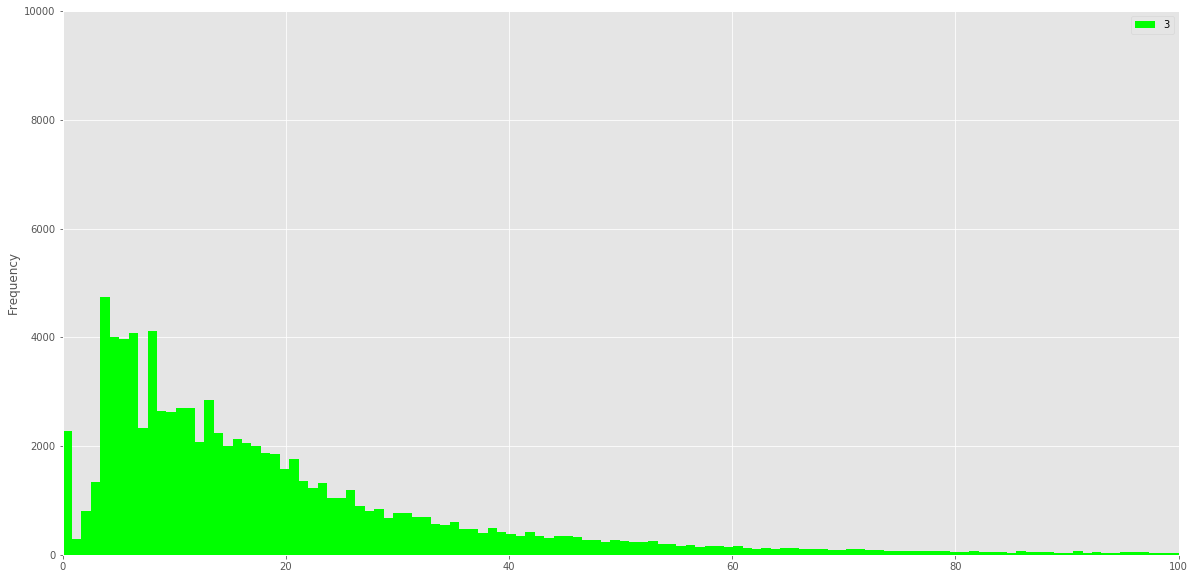

In [18]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

#おまじない
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

#change directory
#os.chdir("/Users/shimpei.i.kubota/Dropbox/PythonCode/190500_labnote/190504_Mp_Ki67/190504_Mp_Ki67_csv")
#make dataframe 
#df = pd.read_csv('190514_A549_Iba1_Ki67_sumCon10.csv')
#列を指定
dfg = df_sum4.iloc[:,[3]]
dfg.plot(kind='hist',stacked=False, normed=False, bins=4000,
         alpha=1, figsize=(20,10), grid=True, 
         xticks=[0, 20, 40, 60, 80, 100], xlim=[0,100],
         yticks=[0, 2000, 4000, 6000, 8000, 10000], ylim=[0,10000],
        colormap='brg_r')
plt.savefig('200510_A549_aGPIb_SMA_BSA1hr_hist6.png')
plt.savefig('200510_A549_aGPIb_SMA_BSA1hr_hist6.pdf')
plt.savefig('200510_A549_aGPIb_SMA_BSA1hr_hist6.eps')

/Users/shimpei.i.kubota/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


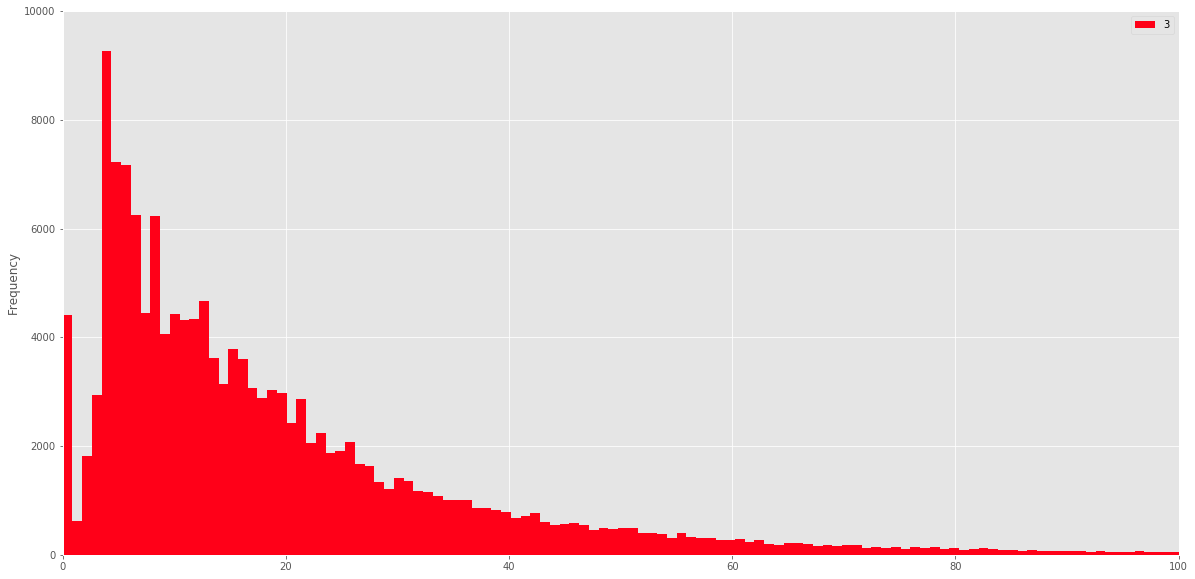

In [19]:
#Excelを扱うのに必要なライブラリ
import os, csv, openpyxl, glob
#グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt
#データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

#おまじない
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

#change directory
#os.chdir("/Users/shimpei.i.kubota/Dropbox/PythonCode/190500_labnote/190504_Mp_Ki67/190504_Mp_Ki67_csv")
#make dataframe 
#df = pd.read_csv('190514_A549_Iba1_Ki67_sumCon10.csv')
#列を指定
dfg = df_sum4.iloc[:,[7]]
dfg.plot(kind='hist',stacked=False, normed=False, bins=4000,
         alpha=1, figsize=(20,10), grid=True, 
         xticks=[0, 20, 40, 60, 80, 100], xlim=[0,100],
         yticks=[0, 2000, 4000, 6000, 8000, 10000], ylim=[0,10000],
        colormap='hsv_r')
plt.savefig('200510_A549_aGPIb_SMA_Tb1hr_hist7.png')
plt.savefig('200510_A549_aGPIb_SMA_Tb1hr_hist7.pdf')
plt.savefig('200510_A549_aGPIb_SMA_Tb1hr_hist7.eps')

     BSA     Tb
0   8572  29211
1  11402  10437
2  12927  17367


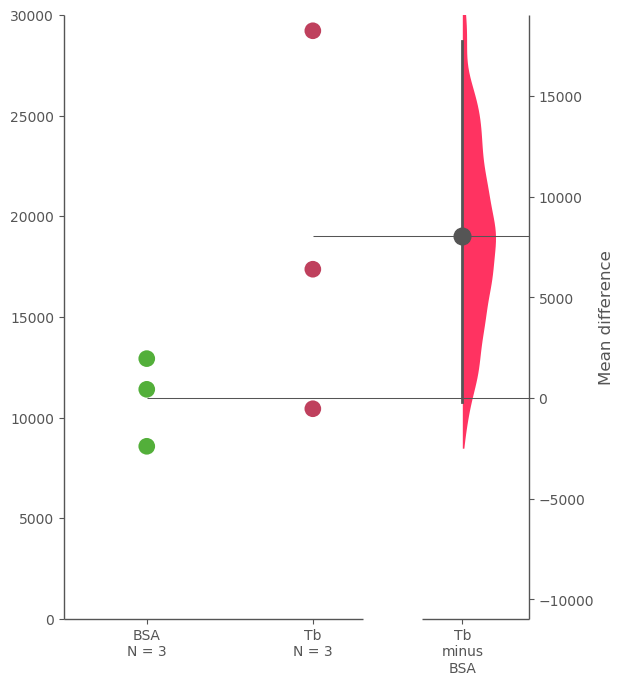

In [31]:
# Load the csv dataset
df = pd.read_csv("/Users/shimpei.i.kubota/Dropbox/100_Research/124_CUBIC_Syn/RawData/Fig6/200510_190305A549_col_02.csv")
df = df.iloc[:,[0,1]]
print (df)

# Load the above data into 'dabest'
df = dabest.load(df, idx=("BSA", "Tb"), ci=95)
df.mean_diff.plot(fig_size=(6, 8), custom_palette="prism",
                  raw_marker_size=12, es_marker_size=12, swarm_ylim=(0, 30000))

plt.savefig('200510_A549_aGPIb_SMA_1hr_TotCol01.png')
plt.savefig('200510_A549_aGPIb_SMA_1hr_TotCol01.pdf')
plt.savefig('200510_A549_aGPIb_SMA_1hr_TotCol01.eps')